# Kaggle project - Surviving the Titanic 2

Same as the other one, except that I'm not going to use graphlab at all this time.

## 0. Imports

In [129]:
import pandas as pd
import numpy as np
import pylab as P

## 1. Read in data and look at it

In [130]:
train_data = pd.read_csv('D:\\Jason\\Data\\titanic\\train.csv',header=0)

In [131]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 1.1 Info

In [132]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


So it looks like there are missing ages, the cabin field is not well-populated, and there are a couple of missing values in the embarked column.

### 1.2 Descriptive statistics
Ignoring nulls of course.

In [133]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 1.3 Messing around

In [134]:
train_data['Age'][0:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [135]:
train_data.Age[0:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [136]:
train_data.Cabin[0:10]

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [137]:
train_data['Age'].mean()

29.69911764705882

In [138]:
train_data['Age'].median()

28.0

In [139]:
train_data[ ['Sex','Pclass','Age']]

,Sex,Pclass,Age
0,male,3,22.0
1,female,1,38.0
2,female,3,26.0
3,female,1,35.0
4,male,3,35.0
5,male,3,NaN
6,male,1,54.0
7,male,3,2.0
8,female,3,27.0
9,female,2,14.0


In [140]:
train_data[train_data['Age']>60]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [141]:
train_data[train_data['Age']>60][['Sex','Pclass','Age','Survived']]

,Sex,Pclass,Age,Survived
33,male,2,66.0,0
54,male,1,65.0,0
96,male,1,71.0,0
116,male,3,70.5,0
170,male,1,61.0,0
252,male,1,62.0,0
275,female,1,63.0,1
280,male,3,65.0,0
326,male,3,61.0,0
438,male,1,64.0,0


### 1.4 Fill in missing age values

In [142]:
train_data[train_data['Age'].isnull()][['Sex','Pclass','Age']]

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN
29,male,3,NaN
31,female,1,NaN
32,female,3,NaN
36,male,3,NaN
42,male,3,NaN


In [143]:
for i in range(1,4):
    print i, len(train_data[(train_data['Sex']=='male')&(train_data['Pclass']==i)])

1 122
2 108
3 347


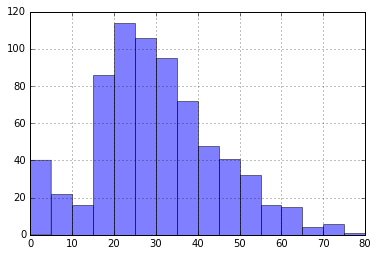

In [144]:
%matplotlib inline
train_data['Age'].dropna().hist(bins=16, range=(0,80), alpha=0.5)
P.show()

## 2. Clean up the data

### 2.1 Gender
* Female = 0, male = 1

In [145]:
train_data['Gender'] = train_data['Sex'].map({'female':0,'male':1}).astype(int)

In [146]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


### 2.2 Port of embarkation

In [147]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [148]:
train_data.fillna({'Embarked':'X'},inplace=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


How about 0 = X, 1 = S, 2 = C, 3 = Q?

In [149]:
train_data[61:62]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,X,0


In [150]:
train_data['Departure']=train_data['Embarked'].map({'X':0,'S':1,'C':2,'Q':3}).astype(int)

### 2.3 Ages
We're going to fill missing ages by taking the median over each passenger class.

In [151]:
median_ages = np.zeros((2,3))
median_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [152]:
for i in range(0,2):
    for j in range(0,3):
        median_ages[i,j]=train_data[(train_data['Gender']==i)&(train_data['Pclass']==j+1)]['Age'].dropna().median()
median_ages

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

In [153]:
train_data['AgeFill'] = train_data['Age']

In [154]:
for i in range(0,2):
    for j in range(0,3):
        train_data.loc[ (train_data.Age.isnull()) & (train_data.Gender==i) & (train_data.Pclass==j+1),\
                      'AgeFill']=median_ages[i,j]

In [155]:
train_data[train_data['Age'].isnull()][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0
28,0,3,NaN,21.5
29,1,3,NaN,25.0
31,0,1,NaN,35.0
32,0,3,NaN,21.5
36,1,3,NaN,25.0
42,1,3,NaN,25.0


In [156]:
train_data['AgeIsNull']=pd.isnull(train_data.Age).astype(int)

In [157]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Departure,AgeFill,AgeIsNull
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,1.359147,29.112424,0.198653
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.638707,13.304424,0.399210
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,1.000000,21.500000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000,26.000000,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,2.000000,36.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,3.000000,80.000000,1.000000


OOPS - the effect of filling in age that way was to re-skew the distribution back toward younger people. Later I might try another method of cleaning this up.

In [158]:
train_data['FamilySize'] = train_data['SibSp'] * train_data['Parch']
train_data['AgeClass'] = train_data['AgeFill']*train_data['Pclass']

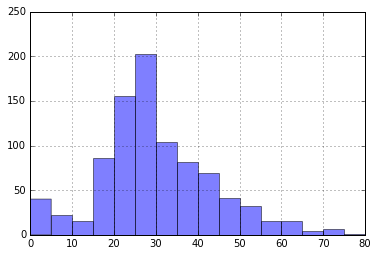

In [159]:
train_data['AgeFill'].dropna().hist(bins=16, range=(0,80), alpha=0.5)
P.show()

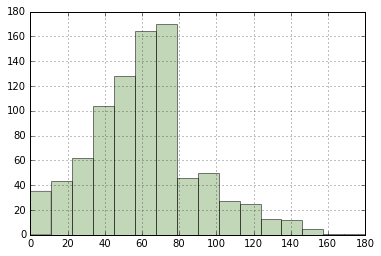

In [160]:
train_data['AgeClass'].dropna().hist(bins=16, range=(0,180), alpha=0.5,color='sage')
P.show()

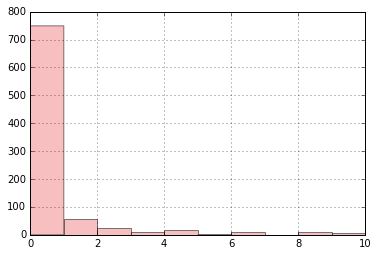

In [161]:
train_data['FamilySize'].dropna().hist(bins=10, range=(0,10), alpha=0.5, color='lightcoral')
P.show()

## 3. Repeat analysis of gcf from last time

### 3.1 Deal with missing fares

In [162]:
train_data[train_data['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Departure,AgeFill,AgeIsNull,FamilySize,AgeClass


### 3.2 Bin the fares as before

In [163]:
def bin_fares(fares, censorFares=60, binWidth=10):
    try:
        if fares >= censorFares:
            return censorFares // binWidth
        else: 
            return fares // binWidth
    except:
        return 15 // binWidth

In [164]:
train_data['Farebin'] = train_data['Fare'].apply(bin_fares)

### 3.3 Make survival table

In [165]:
genders = np.unique(train_data['Sex'])
sesClasses = np.unique(train_data['Pclass'])
farebins = np.unique(train_data['Farebin'])
print genders
print sesClasses
print farebins

['female' 'male']
[1 2 3]
[ 0.  1.  2.  3.  4.  5.  6.]


In [166]:
sexCol = []
sesCol = []
fareCol = []
probCol=[]

In [167]:
for g in genders:
    for c in sesClasses:
        for f in farebins:
            sexCol.append(g)
            sesCol.append(c)
            fareCol.append(f)
            
            data = train_data[(train_data['Sex']==g)&(train_data['Pclass']==c)&(train_data['Farebin']==f)]
            surv = np.sum(data['Survived'])
            num = float(len(data))
            if (num == 0):
                prob = 0
            else:
                prob = surv/num
            probCol.append( prob )

In [168]:
surv_table = pd.DataFrame({'Sex':sexCol,'Pclass':sesCol,'Farebin':fareCol,'gcfprob':probCol})

In [169]:
surv_table['gcfpred'] = surv_table['gcfprob'].apply(lambda x: 1 if x >= 0.5 else 0)

In [170]:
surv_table

,Farebin,Pclass,Sex,gcfprob,gcfpred
0,0.0,1,female,0.000000,0
1,1.0,1,female,0.000000,0
2,2.0,1,female,0.833333,1
3,3.0,1,female,1.000000,1
4,4.0,1,female,1.000000,1
5,5.0,1,female,1.000000,1
6,6.0,1,female,0.970149,1
7,0.0,2,female,0.000000,0
8,1.0,2,female,0.914286,1
9,2.0,2,female,0.900000,1


In [171]:
pred_train_data = pd.merge(train_data,surv_table, on=['Sex','Pclass','Farebin'], how='left')

In [172]:
pred_train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Gender,Departure,AgeFill,AgeIsNull,FamilySize,AgeClass,Farebin,gcfprob,gcfpred
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,1,1,22.0,0,0,66.0,0.0,0.111538,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,0,2,38.0,0,0,38.0,6.0,0.970149,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,1,26.0,0,0,78.0,0.0,0.593750,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,0,1,35.0,0,0,35.0,5.0,1.000000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,1,1,35.0,0,0,105.0,0.0,0.111538,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,Q,1,3,25.0,1,0,75.0,0.0,0.111538,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,S,1,1,54.0,0,0,54.0,5.0,0.411765,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,S,1,1,2.0,0,3,6.0,2.0,0.125000,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,S,0,1,27.0,0,0,81.0,1.0,0.581395,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,C,0,2,14.0,0,0,28.0,3.0,1.000000,1


In [173]:
train_truepos = len(pred_train_data[(pred_train_data['Survived']==1)&(pred_train_data['gcfpred']==1)])
train_falsepos = len(pred_train_data[(pred_train_data['Survived']==0)&(pred_train_data['gcfpred']==1)])
train_falseneg = len(pred_train_data[(pred_train_data['Survived']==1)&(pred_train_data['gcfpred']==0)])
train_trueneg = len(pred_train_data[(pred_train_data['Survived']==0)&(pred_train_data['gcfpred']==0)])

In [174]:
train_precision = train_truepos / float(train_truepos+train_falsepos)
train_recall = train_truepos / float(train_truepos+train_falseneg)

In [175]:
print 'Training precision: {:.2%}'.format(train_precision)
print 'Training recall: {:.2%}'.format(train_recall)

Training precision: 80.63%
Training recall: 66.96%


## 4. Machine learning starts

### 4.1 Check data types, and transform / drop any columns with strings

In [176]:
pred_train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Gender           int32
Departure        int32
AgeFill        float64
AgeIsNull        int32
FamilySize       int64
AgeClass       float64
Farebin        float64
gcfprob        float64
gcfpred          int64
dtype: object

In [177]:
pred_train_data.dtypes[pred_train_data.dtypes.map(lambda x: x == 'object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

I already transformed sex and embarked so we don't care about those anymore. We can also drop the other string columns, and the original age too.

In [178]:
pred_train_data = pred_train_data.drop(['Sex','Name','Ticket','Cabin','Embarked'],axis=1)

In [179]:
pred_train_data = pred_train_data.drop(['gcfprob','gcfpred','PassengerId'],axis=1)

### 4.2 Convert to numpy array

In [180]:
traindata = pred_train_data.values
traindata

array([[  0. ,   3. ,  22. , ...,   0. ,  66. ,   0. ],
       [  1. ,   1. ,  38. , ...,   0. ,  38. ,   6. ],
       [  1. ,   3. ,  26. , ...,   0. ,  78. ,   0. ],
       ..., 
       [  0. ,   3. ,   nan, ...,   2. ,  64.5,   2. ],
       [  1. ,   1. ,  26. , ...,   0. ,  26. ,   3. ],
       [  0. ,   3. ,  32. , ...,   0. ,  96. ,   0. ]])

### 4.3 It's model time

In [181]:
from sklearn.ensemble import RandomForestClassifier

In [182]:
forest = RandomForestClassifier(n_estimators=100)

In [183]:
forest.fit(traindata[0::,1::], traindata[0::,0])

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

### 4.4 I've fit the model, now it's time to convert test data

#### 4.4.1 Read in test data

In [ ]:
test_data = pd.read_csv('D:\\Jason\\Data\\titanic\\test.csv',header=0)

#### 4.4.2 Transform gender column

In [ ]:
test_data['Gender'] = test_data['Sex'].map({'female':0,'male':1}).astype(int)

#### 4.4.3 Transform departure location

In [ ]:
test_data.fillna({'Embarked':'X'},inplace=True)
test_data['Departure']=test_data['Embarked'].map({'X':0,'S':1,'C':2,'Q':3}).astype(int)

In [127]:
median_ages = np.zeros((2,3))
for i in range(0,2):
    for j in range(0,3):
        median_ages[i,j]=test_data[(test_data['Gender']==i)&(test_data['Pclass']==j+1)]['Age'].dropna().median()
median_ages

array([[ 41.,  24.,  22.],
       [ 42.,  28.,  24.]])

In [128]:
test_data['AgeFill'] = test_data['Age']
for i in range(0,2):
    for j in range(0,3):
        test_data.loc[ (test_data.Age.isnull()) & (test_data.Gender==i) & (test_data.Pclass==j+1),\
                      'AgeFill']=median_ages[i,j]
test_data[train_data['Age'].isnull()][['Gender','Pclass','Age','AgeFill']].head(10)      

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Gender,Pclass,Age,AgeFill
5,1,3,14.0,14.0
17,1,3,21.0,21.0
19,0,3,45.0,45.0
26,0,1,22.0,22.0
28,1,1,41.0,41.0
29,1,3,NaN,24.0
31,1,2,24.0,24.0
32,0,3,33.0,33.0
36,0,3,NaN,22.0
42,1,3,41.0,41.0
